The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
tensor([ 1,  4,  0,  1])
brake wheel  bike brake


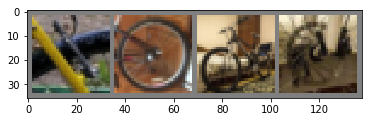

In [13]:
from network import *
from helper import *

import torch
import torchvision
from torchvision import transforms, datasets

%load_ext autoreload
%autoreload 2

base_path = '/mnt/11DCF430046E321B/CV'
path = base_path + '/fmb'
batch_size = 4

data_transform = transforms.Compose([
        transforms.Resize([32,32]),
        transforms.ToTensor(),
        #transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])


trainset = datasets.ImageFolder(root=path, transform=data_transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=4)

testset = datasets.ImageFolder(root=path, transform=data_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = trainset.classes

dataiter = iter(trainloader)
images, labels = dataiter.next()

print (labels)
#imshow(images[0])
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [10]:
weigths_path = base_path + "/pytorch_data/networks/fmb.weights"
net = Net()
# Do not remove
#net.load_state_dict(torch.load(weigths_path))
train(trainloader,net,200)
#torch.save(net.state_dict(), weigths_path)



Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
Finished Training


GroundTruth:   bike  bike  bike  bike
Predicted:   bike  bike  bike  bike
Accuracy of the network on the 10000 test images: 100 %
Accuracy of wheel : 100 %
Accuracy of frame : 100 %
Accuracy of  fork : 100 %
Accuracy of brake : 100 %
Accuracy of  bike : 100 %


[('wheel', 100.0),
 ('frame', 100.0),
 ('fork', 100.0),
 ('brake', 100.0),
 ('bike', 100.0)]

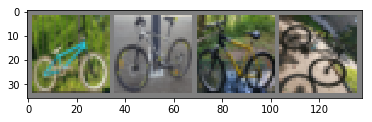

In [16]:
from check import *
check(testloader,net,classes)


In [17]:
print (images)

tensor([[[[ 0.3020,  0.1765,  0.2157,  ...,  0.1216, -0.0824, -0.0667],
          [ 0.5529,  0.3333,  0.2863,  ...,  0.2235,  0.1765,  0.1686],
          [ 0.5529,  0.5137,  0.3020,  ...,  0.0980,  0.1373,  0.1373],
          ...,
          [-0.0902, -0.0667, -0.0980,  ..., -0.0196, -0.1294, -0.1059],
          [-0.7255, -0.7020, -0.6863,  ..., -0.0902, -0.0588, -0.0118],
          [-0.5608, -0.6549, -0.6863,  ..., -0.8353, -0.8039, -0.7961]],

         [[ 0.1451,  0.0353,  0.1216,  ..., -0.0196, -0.2000, -0.1529],
          [ 0.3569,  0.1765,  0.2000,  ...,  0.0980,  0.0510,  0.0431],
          [ 0.3333,  0.3647,  0.1843,  ...,  0.0039,  0.0196, -0.0118],
          ...,
          [ 0.1608,  0.1922,  0.1765,  ...,  0.1373, -0.0118, -0.0275],
          [-0.5294, -0.4824, -0.4196,  ...,  0.2157,  0.2392,  0.2627],
          [-0.5137, -0.5686, -0.5451,  ..., -0.4745, -0.4196, -0.4353]],

         [[-0.1765, -0.0588,  0.0667,  ..., -0.1137, -0.3333, -0.3176],
          [-0.3490, -0.0588,  